In [1]:
import numpy as np, prjlib, plottools as pl, healpy as hp, pickle, curvedsky, quad_func, misctools, tools_lens, tools_delens, tools_multitracer
from matplotlib.pyplot import *

In [2]:
snmin, snmax = 1, 100
olmax = 1024
klist = ['comb']

In [3]:
Wsa, __ = prjlib.window('sa',512)
pid = prjlib.analysis_init(t='id',ntype='cv',snmin=snmin,snmax=snmax)

/global/homes/t/toshiyan/.local/lib/python3.7/site-packages/healpy/fitsfunc.py:369: UserWarning: If you are not specifying the input dtype and using the default np.float64 dtype of read_map(), please consider that it will change in a future version to None as to keep the same dtype of the input file: please explicitly set the dtype if it is important to you.
  "If you are not specifying the input dtype and using the default "
/global/homes/t/toshiyan/.local/lib/python3.7/site-packages/healpy/fitsfunc.py:391: UserWarning: NSIDE = 512
  warnings.warn("NSIDE = {0:d}".format(nside))
/global/homes/t/toshiyan/.local/lib/python3.7/site-packages/healpy/fitsfunc.py:400: UserWarning: ORDERING = RING in fits file
  warnings.warn("ORDERING = {0:s} in fits file".format(ordering))
/global/homes/t/toshiyan/.local/lib/python3.7/site-packages/healpy/fitsfunc.py:428: UserWarning: INDXSCHM = IMPLICIT
  warnings.warn("INDXSCHM = {0:s}".format(schm))


SAT mask is further multiplied by hit-count binary


In [10]:
d = prjlib.data_directory()
dobj = {}
n = 'goal'
for ntype in [n,n+'_iso']:
    p = prjlib.analysis_init(t='la',freq='com',fltr='none',snmin=snmin,snmax=snmax,ntype=ntype+'_roll50')
    pE = prjlib.analysis_init(t='co',freq='com',fltr='cinv',ntype=ntype.replace('_iso','')+'_roll50')
    qobj = tools_lens.init_qobj(p.stag,'False',rlmin=300,rlmax=4096)
    mobj = tools_multitracer.mass_tracer(p,qobj,add_cmb=['TT','TE','EE','EB'])
    dobj[ntype] = tools_delens.init_template(p.stag+qobj.ltag,mobj.klist,pE.stag,False,klist=klist,kfltr='none',elmin=50)

/global/homes/t/toshiyan/.conda/envs/loc/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  
/global/homes/t/toshiyan/.conda/envs/loc/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


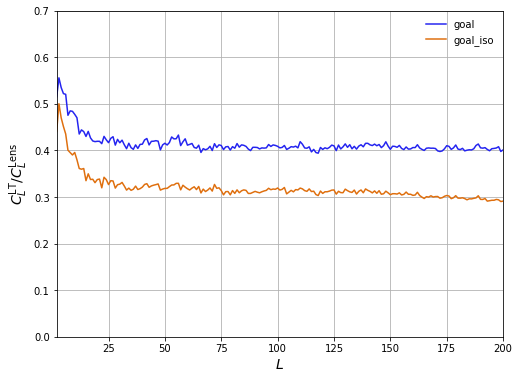

In [11]:
pl.plot_1dstyle(fsize=[8,6],xmin=2,xmax=200,ymin=.0,ymax=.7,grid=True,ylab=r'$C_L^{\rm LT}/C_L^{\rm Lens}$')
for ntype in [n,n+'_iso']:
    r = 0
    for i in range(snmin,snmax+1):
        BB, TT, BT = np.loadtxt(dobj[ntype].cl['comb'][i],unpack=True)
        r += BT**2/BB/TT
    plot(1-r/(snmax-snmin+1),label=ntype)
legend(loc=0)
#savefig('fig_BB_correlation.pdf')

AttributeError: 'dict' object has no attribute 'cl'

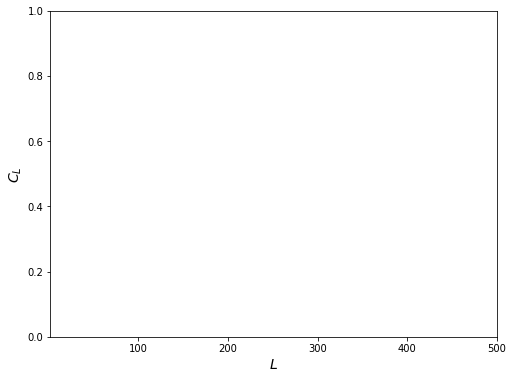

In [6]:
# BB spec
wnsa = 1.
pl.plot_1dstyle(xmin=2,xmax=500)
BB, TT, BT = np.loadtxt(dobj.cl['comb'][1],unpack=True)
plot(BB/wnsa,label='Input BB with SAT window')
plot(TT/wnsa,label='Template BB at SAT')
plot(BT/wnsa,label='Cross')
plot(p.lcl[2])
legend()
#savefig('fig_example.png')

In [ ]:
pl.plot_1dstyle(fsize=[8,6],xmin=2,xmax=200,ymin=.0,ymax=.6,grid=True,ylab=r'$C_L^{\rm LT}/C_L^{\rm Lens}$')
for ntype in ['base','goal']:
    bb, rho = np.loadtxt(dobj[ntype].frho,unpack=True,usecols=(1,2))
    #plot(rho[fltr]/bb[fltr])
    plot(rho/bb)
    #savefig('fig_wopt_'+fltr+'_'+ntype+'_k'+kfltr+'_'+p.stag+qobj.ltag+'_'+pE.stag+'.png')